# PROJECT NAME : PRCP-1016-HEARTDISEASEPRED

# PROJECT TEAM ID : PTID-CDS-JUN-23-1549

# Business Case : To check whether the patient has heart disease present or not based on data provided .

# Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

* Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.


# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,IsolationForest
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

# Load data

In [3]:
df=pd.read_csv('values.csv')
df1=pd.read_csv('labels.csv')
data1=pd.concat([df1,df],axis=1)
data=pd.DataFrame(data1)


In [4]:
data

,patient_id,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [5]:
pd.set_option('display.max_rows',None) ## displaying all rows


In [6]:
data

,patient_id,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,0,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,1,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,1,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,1,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,0,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [7]:
data.shape

(180, 16)

In [8]:
len(data)

180

# Basic checks

In [9]:
data.head()

,patient_id,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [10]:
data.tail()

,patient_id,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,1,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,0,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [11]:
data.columns

Index(['patient_id', 'heart_disease_present', 'patient_id',
       'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   patient_id                            180 non-null    object 
 3   slope_of_peak_exercise_st_segment     180 non-null    int64  
 4   thal                                  180 non-null    object 
 5   resting_blood_pressure                180 non-null    int64  
 6   chest_pain_type                       180 non-null    int64  
 7   num_major_vessels                     180 non-null    int64  
 8   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 9   resting_ekg_results                   180 non-null    int64  
 10  serum_cholesterol_mg_per_dl           180 non-null    int64  
 11  oldpeak_eq_st_depre

In [13]:
data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [14]:
data.describe(include = 'O')

,patient_id,patient_id,thal
count,180,180,180
unique,180,180,3
top,0z64un,0z64un,normal
freq,1,1,98


In [15]:
#dropping 'patient_id' column
data.drop('patient_id',axis=1,inplace=True)

# Domain Analysis

##### Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
###### Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous


* 
* There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.


* slope_of_peak_exercise_st_segment : the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

* thal : results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

* resting_blood_pressure : resting blood pressure

* chest_pain_type :  chest pain type (4 values) , The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* num_major_vessels :  number of major vessels (0-3) colored by flourosopy

* fasting_blood_sugar_gt_120_mg_per_dl :   fasting blood sugar > 120 mg/dl

* resting_ekg_results :  resting electrocardiographic results (values 0,1,2)

* serum_cholesterol_mg_per_dl :   serum cholestoral in mg/dl

* oldpeak_eq_st_depression : oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

* sex : The person's sex (1 = male, 0 = female)

* age : age in years

* max_heart_rate_achieved :  maximum heart rate achieved (beats per minute)

* exercise_induced_angina : exercise-induced chest pain (0: False, 1: True)

* heart_disease_present : Heart disease (0 = no, 1 = yes)


In [16]:
data.isna().sum()                               #checking for missing values



heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [17]:

data.duplicated().sum()                         #checking for duplicated values

0

# # EDA

# # Univariate Analysis

In [18]:
import sweetviz as sv                             #library for univariate analysis
my_report=sv.analyze(data)                        #pass the original dataframe
my_report.show_html()                             #Default arguments will generate to "SWEETVIZ_REPORT.html" 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
# # Insights of Univariate Analysis
# - 52% of the patients have the priority of slope exercise segment.
# - 54% of the patients have the normal(no defect) of thal.
# - 14.4% of the patients have the 130 as the resting blood pressure.
# - 46% of the patients have the value 4 of chest pain type.
# - 59% of the patients have no major blood vessel blockages.
# - 84% of the patients have fasting blood sugar levels below 120 mg/dl, which is considered normal.
# - 52% of the patients have normal resting ECG results.
# - 33% of the patients have normal cholesterol levels, but there is a significant minority with high cholesterol levels.
# - 47% of the patients have have no or minimal ST segment depression during exercise, but there is a significant minority with moderate or severe depression, which can indicate a higher risk of heart disease.
# - 69% of the males are more likely to develop heart disease than females.
# - 20% of the Older individuals are more likely to develop heart disease than younger individuals.
# - 20% of the individuals achieve a maximum heart rate of around 150-170 beats per minute during exercise.
# - 68% of the individuals experience exercise-induced angina may be at higher risk of heart disease.
# - target column shows proportion of individuals without heart disease than with heart disease.


In [20]:
# # Bivariate Analysis

In [21]:
data.columns                             #fetching columns

Index(['heart_disease_present', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [22]:

#dividing the data into numerical and categorical data
numerical_data=data[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina','heart_disease_present']]
categorical_data=data['thal']


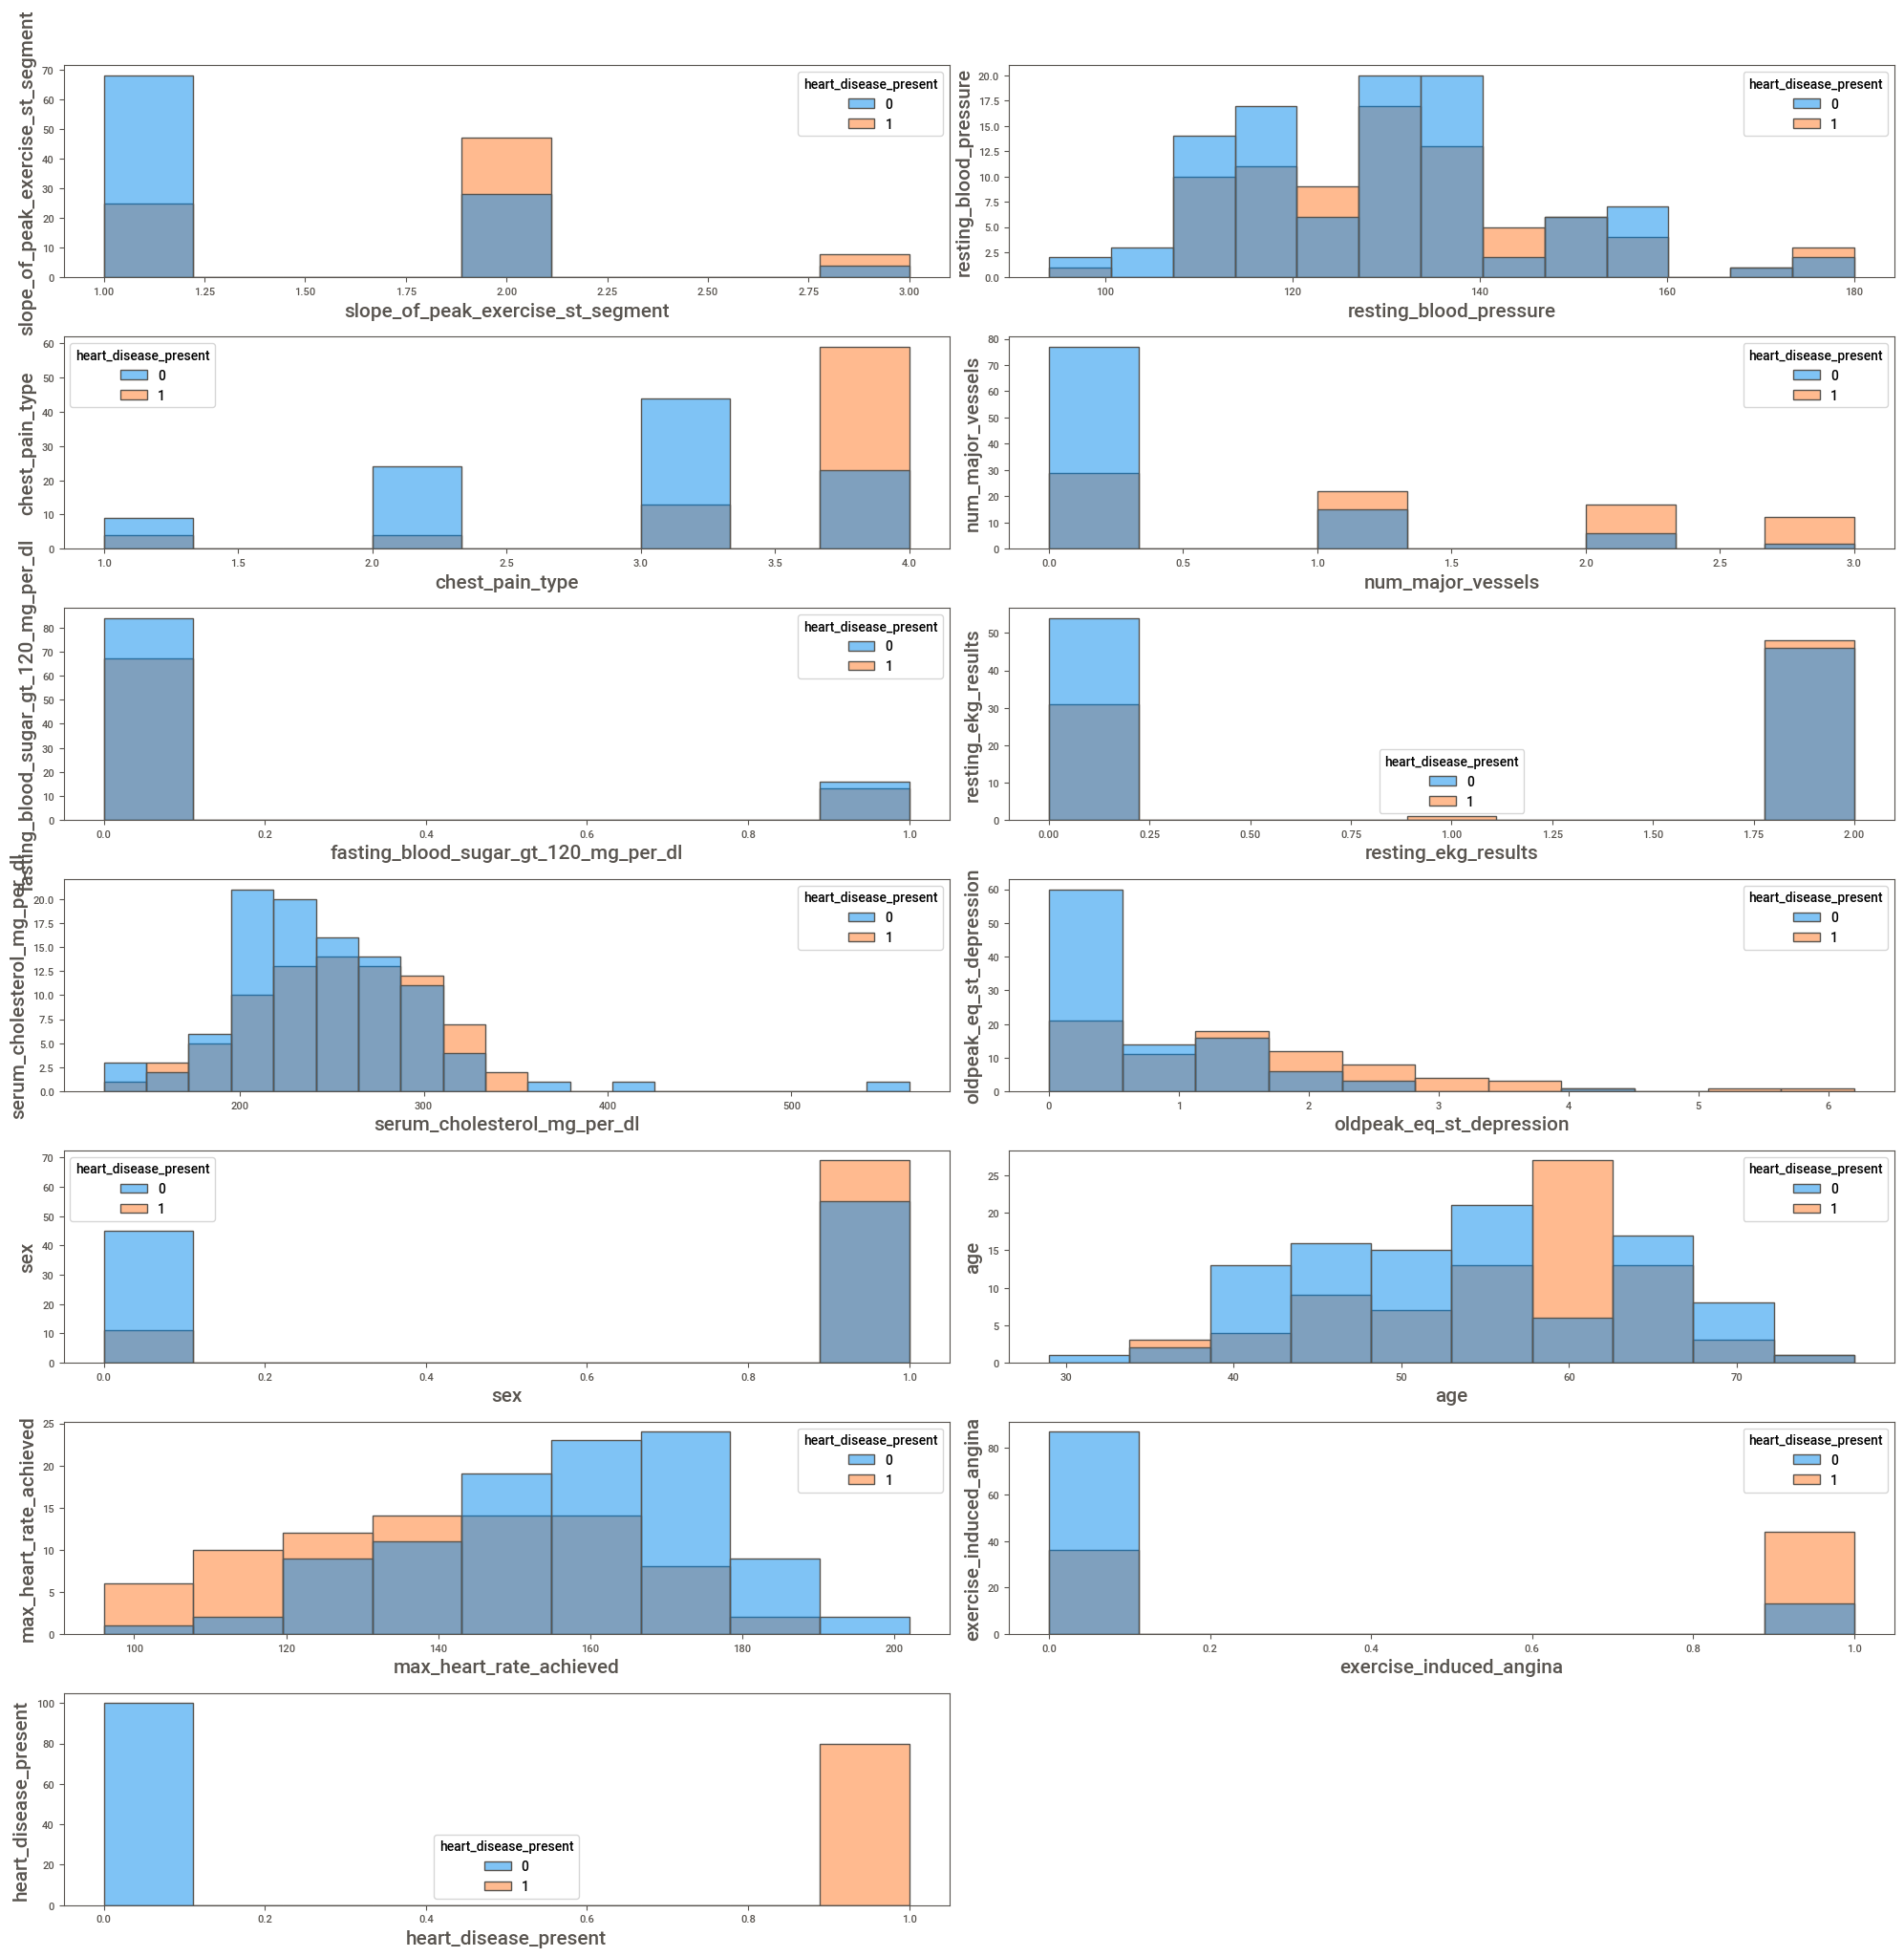

In [23]:

#plotting numerical_data
plt.figure(figsize=(20,20))            #plotting the figure
plotnumber=1                           #plotnumber
for i in numerical_data:
    plt.subplot(7,2,plotnumber)        #subplot
    sns.histplot(data=numerical_data,x=i,hue=data['heart_disease_present'])        #using histplot for the data
    plotnumber+=1                      #plotnumber increment
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

In [24]:
### Conversion of categorical data into numerical data


In [25]:
from sklearn.preprocessing import LabelEncoder              #importing label encoder
lc=LabelEncoder()                                           #object creation for label encoder
data.thal=lc.fit_transform(data.thal)                       #fitting thal column data to convert into numerical data


In [26]:
data.thal.value_counts()                                    #value counts of thal column


1    98
2    74
0     8
Name: thal, dtype: int64

In [27]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0
5,0,1,1,130,3,0,0,0,180,0.0,1,42,150,0
6,1,2,2,150,4,2,0,2,258,2.6,0,60,157,0
7,1,2,0,150,4,1,0,2,276,0.6,1,57,112,1
8,1,3,2,170,4,0,0,2,326,3.4,1,59,140,1
9,0,2,1,120,3,0,0,0,219,1.6,0,50,158,0


In [28]:
# # Insights of Bivariate Analysis
# ### Slope of peak exercise ST segment vs heart disease present: 
# - Slope of peak exercise ST segment and heart disease present: 
# - Individuals with a downsloping ST segment during peak exercise are more likely to have heart disease than individuals with a flat or upsloping ST segment.
# ### thal vs heart disease present
# - Thal and heart disease present: 
# - Individuals with thalassemia are more likely to have heart disease than individuals without thalassemia.
# ### resting blood pressure vs heart disease present
# - Resting blood pressure and heart disease present: 
# - Individuals with high resting blood pressure are more likely to have heart disease than individuals with normal or low resting blood pressure.
# ### chest pain type vs heart disease present
# - Chest pain type and heart disease present: 
# - Individuals with non-anginal chest pain or atypical angina are less likely to have heart disease than individuals with typical angina.
# ### Number of major vessels vs heart disease present
# - Number of major vessels and heart disease present: 
# - Individuals with one or more blocked major blood vessels are more likely to have heart disease than individuals with no blocked vessels.
# ### Fasting blood pressure vs heart disease present
# - Fasting blood sugar > 120 mg/dl and heart disease present: 
# - Individuals with high fasting blood sugar levels are more likely to have heart disease than individuals with normal fasting blood sugar levels.
# ### resting ecg results vs heart disease present
# - Resting ECG results and heart disease present: 
# - Individuals with abnormal resting ECG results are more likely to have heart disease than individuals with normal resting ECG results.
# ### Serum cholesterol vs heart disease present
# - Serum cholesterol and heart disease present: 
# - Individuals with high serum cholesterol levels are more likely to have heart disease than individuals with normal serum cholesterol levels.
# ### Oldpeak equal to ST depression vs heart disease present
# - Oldpeak equal to ST depression and heart disease present: 
# - Individuals with moderate or severe ST segment depression during exercise are more likely to have heart disease than individuals with no or minimal depression.
# ### sex vs heart disease present
# - Sex and heart disease present: 
# - Males are more likely to have heart disease than females.
# ### age vs heart disease present
# - Age and heart disease present: 
# - Older individuals are more likely to have heart disease than younger individuals.
# ### Max heart rate achieved vs heart disease present
# - Max heart rate achieved and heart disease present: 
# - Individuals with lower maximum heart rates during exercise are more likely to have heart disease than individuals with higher maximum heart rates.
# ### Exercise induced angina vs heart disease present
# - Exercise induced angina and heart disease present: 
# - Individuals who experience angina during exercise are more likely to have heart disease than individuals who do not experience angina during exercise.


# Data Preprocessing


In [29]:
data.isnull().sum()                                #checking for null values


heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [30]:
data.isna().sum()                                 #checking for missing values


heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

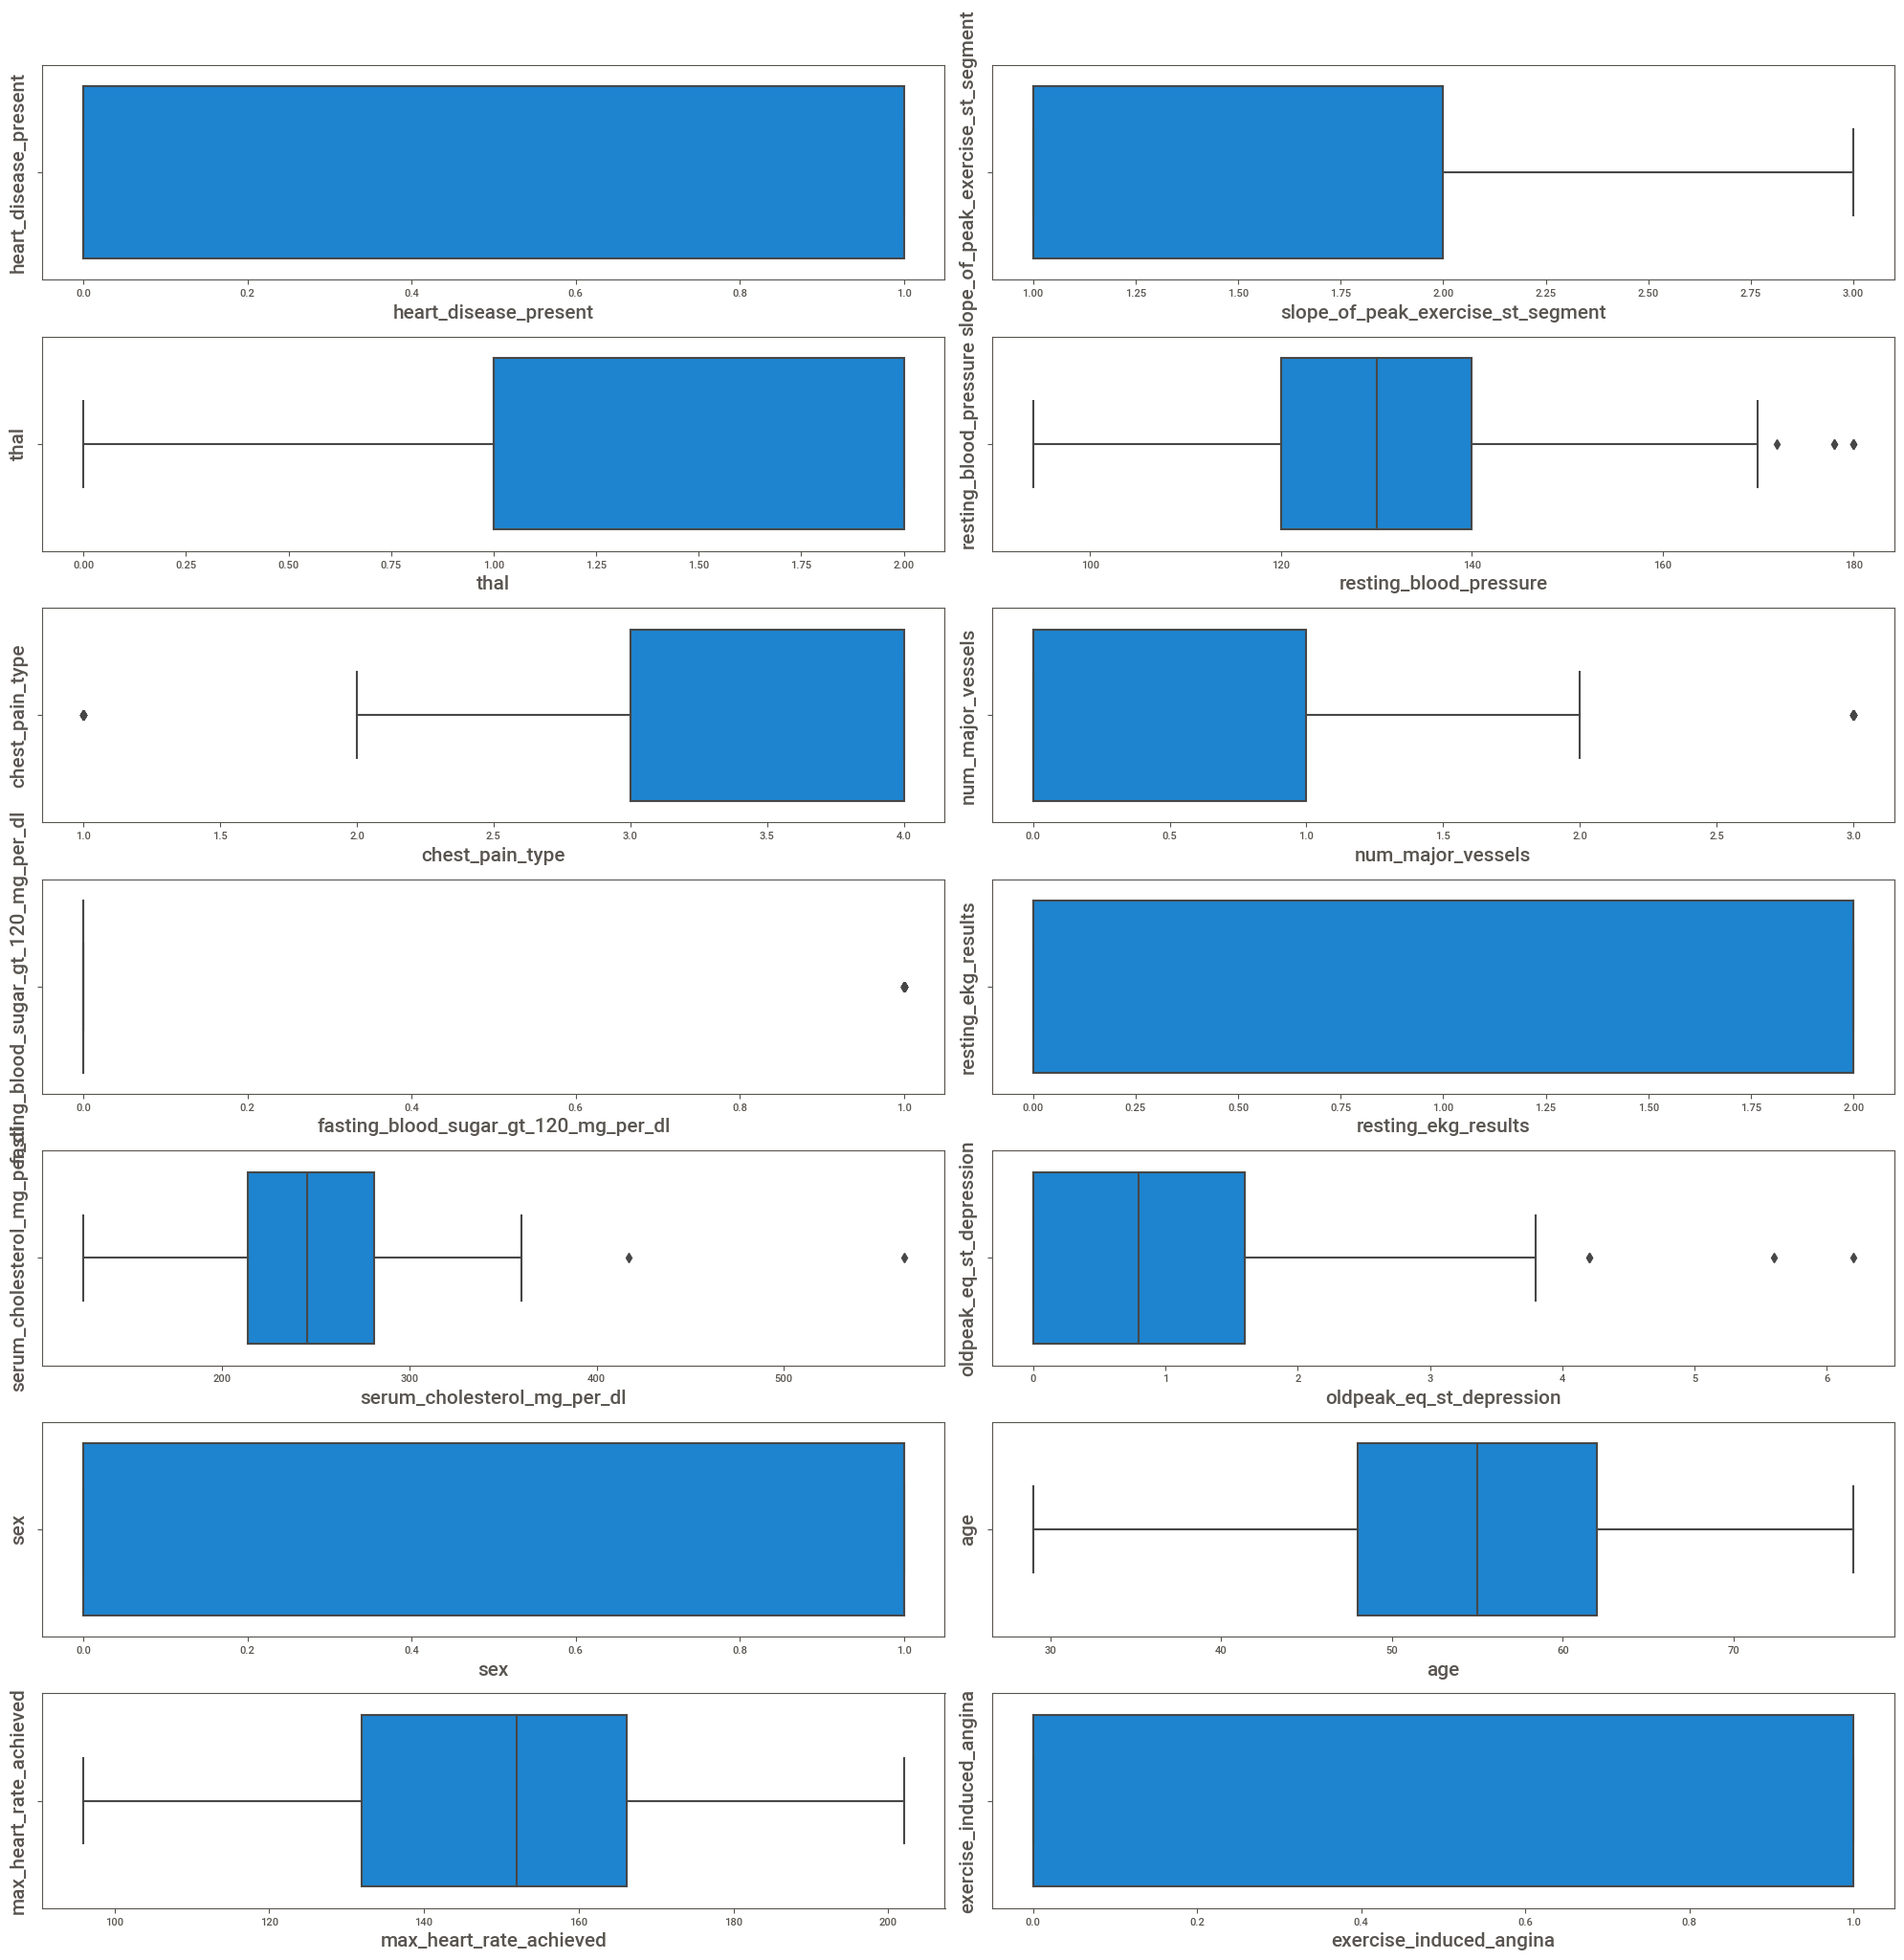

In [31]:
#checking for outliers
plt.figure(figsize=(20,20))            #plotting the figure
plotnumber=1                           #plotnumber
for i in data:
    plt.subplot(7,2,plotnumber)        #subplot
    sns.boxplot(data=data,x=i,hue=data['heart_disease_present'])        #using boxplot for finding outliers of the data
    plotnumber+=1                      #plotnumber increment
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

In [32]:
# # Using IQR to remove Outliers


In [33]:
from scipy import stats             #importing stats for scipy library
IQR=stats.iqr(data.slope_of_peak_exercise_st_segment,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [34]:
Q1=data.slope_of_peak_exercise_st_segment.quantile(0.25)   #defining 25% of data
Q1

1.0

In [35]:
Q3=data.slope_of_peak_exercise_st_segment.quantile(0.75)  #defining 75% of data
Q3

2.0

In [36]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-0.5

In [37]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit


3.5

In [38]:
data.loc[data['slope_of_peak_exercise_st_segment']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [39]:
data.loc[data['slope_of_peak_exercise_st_segment']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [40]:
IQR=stats.iqr(data.thal,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [41]:

Q1=data.thal.quantile(0.25)   #defining 25% of data
Q1


1.0

In [42]:
Q3=data.thal.quantile(0.75)  #defining 75% of data
Q3



2.0

In [43]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-0.5

In [44]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit


3.5

In [45]:
data.loc[data['thal']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [46]:
data.loc[data['slope_of_peak_exercise_st_segment']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [47]:

IQR=stats.iqr(data.resting_blood_pressure,interpolation='midpoint')        #calculating Inter quantile range
IQR

20.0

In [48]:
Q1=data.resting_blood_pressure.quantile(0.25)   #defining 25% of data
Q1

120.0

In [49]:
Q3=data.resting_blood_pressure.quantile(0.75)  #defining 75% of data
Q3

140.0

In [50]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

90.0

In [51]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

170.0

In [52]:
data.loc[data['resting_blood_pressure']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [53]:
data.loc[data['resting_blood_pressure']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0
33,0,1,1,180,4,0,0,0,325,0.0,0,64,154,1
72,0,1,2,172,3,0,1,0,199,0.5,1,52,162,0
75,1,2,2,178,4,2,1,0,228,1.0,0,66,165,1
113,1,2,2,180,3,0,1,2,274,1.6,1,68,150,1
176,1,2,1,180,4,0,0,1,327,3.4,0,55,117,1


In [54]:
data.loc[data['resting_blood_pressure']>max_limit]=np.median(data['resting_blood_pressure'])    #imputing value with median


In [55]:
data.resting_blood_pressure=np.sqrt(data.resting_blood_pressure)


In [56]:
IQR=stats.iqr(data.chest_pain_type,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [57]:

Q1=data.chest_pain_type.quantile(0.25)   #defining 25% of data
Q1


3.0

In [58]:
Q3=data.chest_pain_type.quantile(0.75)  #defining 75% of data
Q3

4.0

In [59]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit


1.5

In [60]:
max_limit=Q1+1.5*IQR              #setting minimum limit
max_limit


4.5

In [61]:
data.loc[data['chest_pain_type']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
14,1,2,2,10.954451,1,0,0,0,231,3.8,1,38,182,1
97,0,2,1,12.649111,1,1,1,2,234,0.1,1,69,131,0
99,0,1,1,12.247449,1,0,1,2,283,1.0,0,58,162,0
108,0,1,1,11.180340,1,1,0,2,213,1.4,1,51,125,1
120,1,2,1,11.747340,1,1,1,2,282,1.4,1,65,174,0
141,0,2,2,10.954451,1,0,0,2,193,1.9,1,56,162,0
146,0,1,2,11.832160,1,0,0,0,199,1.4,1,40,178,1
147,1,2,1,11.575837,1,2,0,0,234,2.6,1,61,145,0
155,1,1,1,12.649111,1,0,0,2,273,0.0,1,59,125,0
156,0,1,1,11.832160,1,2,0,0,239,1.8,0,69,151,0


In [62]:
data.loc[data['chest_pain_type']<min_limit]=np.median(data['chest_pain_type'])    #imputing value with median


In [63]:
data.loc[data['chest_pain_type']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,130,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130
33,130,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130
72,130,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130
75,130,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130
113,130,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130
176,130,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130


In [64]:
data.loc[data['chest_pain_type']>max_limit]=np.median(data['chest_pain_type'])    #imputing value with median


In [65]:
data.chest_pain_type=np.sqrt(data.chest_pain_type)


In [66]:
IQR=stats.iqr(data.num_major_vessels,interpolation='midpoint')        #calculating Inter quantile range
IQR

2.0

In [67]:

Q1=data.num_major_vessels.quantile(0.25)   #defining 25% of data
Q1


0.0

In [68]:

Q3=data.num_major_vessels.quantile(0.75)  #defining 75% of data
Q3

2.0

In [69]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit


-3.0

In [70]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

5.0

In [71]:
data.loc[data['num_major_vessels']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [72]:
data.loc[data['num_major_vessels']<min_limit]=np.median(data['num_major_vessels'])    #imputing value with median


In [73]:
data.loc[data['num_major_vessels']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [74]:
data.loc[data['num_major_vessels']>max_limit]=np.median(data['num_major_vessels'])    #imputing value with median


In [75]:
data.num_major_vessels=np.sqrt(data.num_major_vessels)


In [76]:
IQR=stats.iqr(data.fasting_blood_sugar_gt_120_mg_per_dl,interpolation='midpoint')        #calculating Inter quantile range
IQR

0.0

In [77]:

Q1=data.fasting_blood_sugar_gt_120_mg_per_dl.quantile(0.25)   #defining 25% of data
Q1


0.0

In [78]:
Q3=data.fasting_blood_sugar_gt_120_mg_per_dl.quantile(0.75)   #defining 75% of data
Q3

0.0

In [79]:

min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

0.0

In [80]:

max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

0.0

In [81]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [82]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']<min_limit]=np.median(data['fasting_blood_sugar_gt_120_mg_per_dl'])    #imputing value with median


In [83]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,3,3,3,3.000000,1.732051,1.732051,3,3,3,3.0,3,3,3,3
14,3,3,3,3.000000,1.732051,1.732051,3,3,3,3.0,3,3,3,3
19,1,1,1,11.661904,1.414214,1.414214,1,2,319,0.0,0,58,152,0
21,0,1,2,10.392305,2.000000,1.732051,1,0,233,0.1,1,52,147,0
27,0,1,1,11.313708,1.414214,0.000000,1,0,205,0.0,1,52,184,0
32,1,3,2,11.832160,2.000000,0.000000,1,2,203,3.1,1,53,155,1
33,3,3,3,3.000000,1.732051,1.732051,3,3,3,3.0,3,3,3,3
36,0,1,2,12.247449,1.732051,1.000000,1,0,126,0.2,1,57,173,0
40,0,2,1,12.247449,1.732051,0.000000,1,0,243,1.0,1,61,137,1
42,0,1,1,10.488088,1.732051,1.000000,1,2,265,0.0,0,71,130,0


In [84]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']>max_limit]=np.median(data['fasting_blood_sugar_gt_120_mg_per_dl'])       #imputing value with median


In [85]:
data.fasting_blood_sugar_gt_120_mg_per_dl=np.sqrt(data.fasting_blood_sugar_gt_120_mg_per_dl)


In [86]:
IQR=stats.iqr(data.resting_ekg_results,interpolation='midpoint')        #calculating Inter quantile range
IQR

2.0

In [87]:

Q1=data.resting_ekg_results.quantile(0.25)   #defining 25% of data
Q1

0.0

In [88]:
Q3=data.resting_ekg_results.quantile(0.75)   #defining 75% of data
Q3

2.0

In [89]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-3.0

In [90]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

5.0

In [91]:
data.loc[data['resting_ekg_results']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [92]:
data.loc[data['resting_ekg_results']<min_limit]=np.median(data['resting_ekg_results'])    #imputing value with median


In [93]:
data.loc[data['resting_ekg_results']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [94]:
data.loc[data['resting_ekg_results']>max_limit]=np.median(data['resting_ekg_results'])    #imputing value with median


In [95]:
data.resting_ekg_results=np.sqrt(data.resting_ekg_results)


In [96]:
IQR=stats.iqr(data.serum_cholesterol_mg_per_dl,interpolation='midpoint')        #calculating Inter quantile range
IQR


103.5

In [97]:
Q1=data.serum_cholesterol_mg_per_dl.quantile(0.25)   #defining 25% of data
Q1

166.25

In [98]:
Q3=data.serum_cholesterol_mg_per_dl.quantile(0.75)   #defining 75% of data
Q3


269.0

In [99]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

11.0

In [100]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

424.25

In [101]:
data.loc[data['serum_cholesterol_mg_per_dl']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
14,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
19,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
21,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
27,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
32,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
33,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
36,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
40,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0
42,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0


In [102]:
data.loc[data['serum_cholesterol_mg_per_dl']<min_limit]=np.median(data['serum_cholesterol_mg_per_dl'])      #imputing value with median


In [103]:
data.loc[data['serum_cholesterol_mg_per_dl']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
60,0,2,2,10.723805,1.732051,0.0,0.0,1.414214,564,1.6,0,67,160,0


In [104]:
data.loc[data['serum_cholesterol_mg_per_dl']>max_limit]=np.median(data['serum_cholesterol_mg_per_dl'])


In [105]:
data.serum_cholesterol_mg_per_dl=np.sqrt(data.serum_cholesterol_mg_per_dl)


In [106]:
IQR=stats.iqr(data.oldpeak_eq_st_depression,interpolation='midpoint')        #calculating Inter quantile range
IQR

3.3

In [107]:
Q1=data.oldpeak_eq_st_depression.quantile(0.25)   #defining 25% of data
Q1

0.0

In [108]:

Q3=data.oldpeak_eq_st_depression.quantile(0.75)   #defining 75% of data
Q3


3.25

In [109]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-4.949999999999999

In [110]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

8.2

In [111]:
data.loc[data['oldpeak_eq_st_depression']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [112]:
data.loc[data['oldpeak_eq_st_depression']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
14,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
19,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
21,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
27,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
32,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
33,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
36,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
40,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226
42,226,226,226,226.0,226.0,226.0,226.0,226.0,15.033296,226.0,226,226,226,226


In [113]:
data.loc[data['oldpeak_eq_st_depression']>max_limit]=np.median(data['oldpeak_eq_st_depression'])        #imputing value with median


In [114]:
data.oldpeak_eq_st_depression=np.sqrt(data.oldpeak_eq_st_depression)


In [115]:
data.oldpeak_eq_st_depression=np.sqrt(data.oldpeak_eq_st_depression)


In [116]:
IQR=stats.iqr(data.sex,interpolation='midpoint')        #calculating Inter quantile range
IQR

0.5

In [117]:
Q1=data.sex.quantile(0.25)   #defining 25% of data
Q1

0.75

In [118]:

Q3=data.sex.quantile(0.75)   #defining 75% of data
Q3

1.0

In [119]:

min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

0.0

In [120]:

max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

1.75

In [121]:
data.loc[data['sex']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [122]:
data.loc[data['sex']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [123]:

IQR=stats.iqr(data.age,interpolation='midpoint')        #calculating Inter quantile range
IQR


23.0

In [124]:

Q1=data.age.quantile(0.25)   #defining 25% of data
Q1

36.5

In [125]:
Q3=data.age.quantile(0.75)   #defining 75% of data
Q3

59.0

In [126]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

2.0

In [127]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

93.5

In [128]:
data.loc[data['age']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
14,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
19,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
21,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
27,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
32,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
33,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
36,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
40,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2
42,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.046635,1.2,1.2,1.2,1.2


In [129]:
data.loc[data['age']<min_limit]=np.median(data['age'])           #imputing value with median


In [130]:
data.loc[data['age']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [131]:
data.age=np.sqrt(data.age)


In [132]:
IQR=stats.iqr(data.max_heart_rate_achieved,interpolation='midpoint')        #calculating Inter quantile range
IQR

58.0

In [133]:
Q1=data.max_heart_rate_achieved.quantile(0.25)   #defining 25% of data
Q1

104.5

In [134]:
Q3=data.max_heart_rate_achieved.quantile(0.75)   #defining 75% of data
Q3

162.0

In [135]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

17.5

In [136]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

249.0

In [137]:
data.loc[data['max_heart_rate_achieved']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [138]:
data.loc[data['max_heart_rate_achieved']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [139]:

IQR=stats.iqr(data.exercise_induced_angina,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [140]:
Q1=data.exercise_induced_angina.quantile(0.25)   #defining 25% of data
Q1

0.0

In [141]:

Q3=data.exercise_induced_angina.quantile(0.75)   #defining 75% of data
Q3

1.0

In [142]:

min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit


-1.5

In [143]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

2.5

In [144]:
data.loc[data['exercise_induced_angina']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [145]:
data.loc[data['exercise_induced_angina']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
14,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
19,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
21,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
27,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
32,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
33,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
36,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
40,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0
42,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0


In [146]:
data.loc[data['exercise_induced_angina']>max_limit]=np.median(data['exercise_induced_angina'])       #imputing value with median


In [147]:
data.exercise_induced_angina=np.sqrt(data.exercise_induced_angina)


In [148]:

IQR=stats.iqr(data.heart_disease_present,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [149]:
Q1=data.heart_disease_present.quantile(0.25)   #defining 25% of data
Q1


0.0

In [150]:

Q3=data.heart_disease_present.quantile(0.75)   #defining 75% of data
Q3

1.0

In [151]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-1.5

In [152]:

max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

2.5

In [153]:
data.loc[data['heart_disease_present']<min_limit]         #checking values which are less than minimum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [154]:
data.loc[data['heart_disease_present']>max_limit]         #checking values which are greater than maximum limit


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [155]:
data.heart_disease_present=np.sqrt(data.heart_disease_present)


## Feature Selection

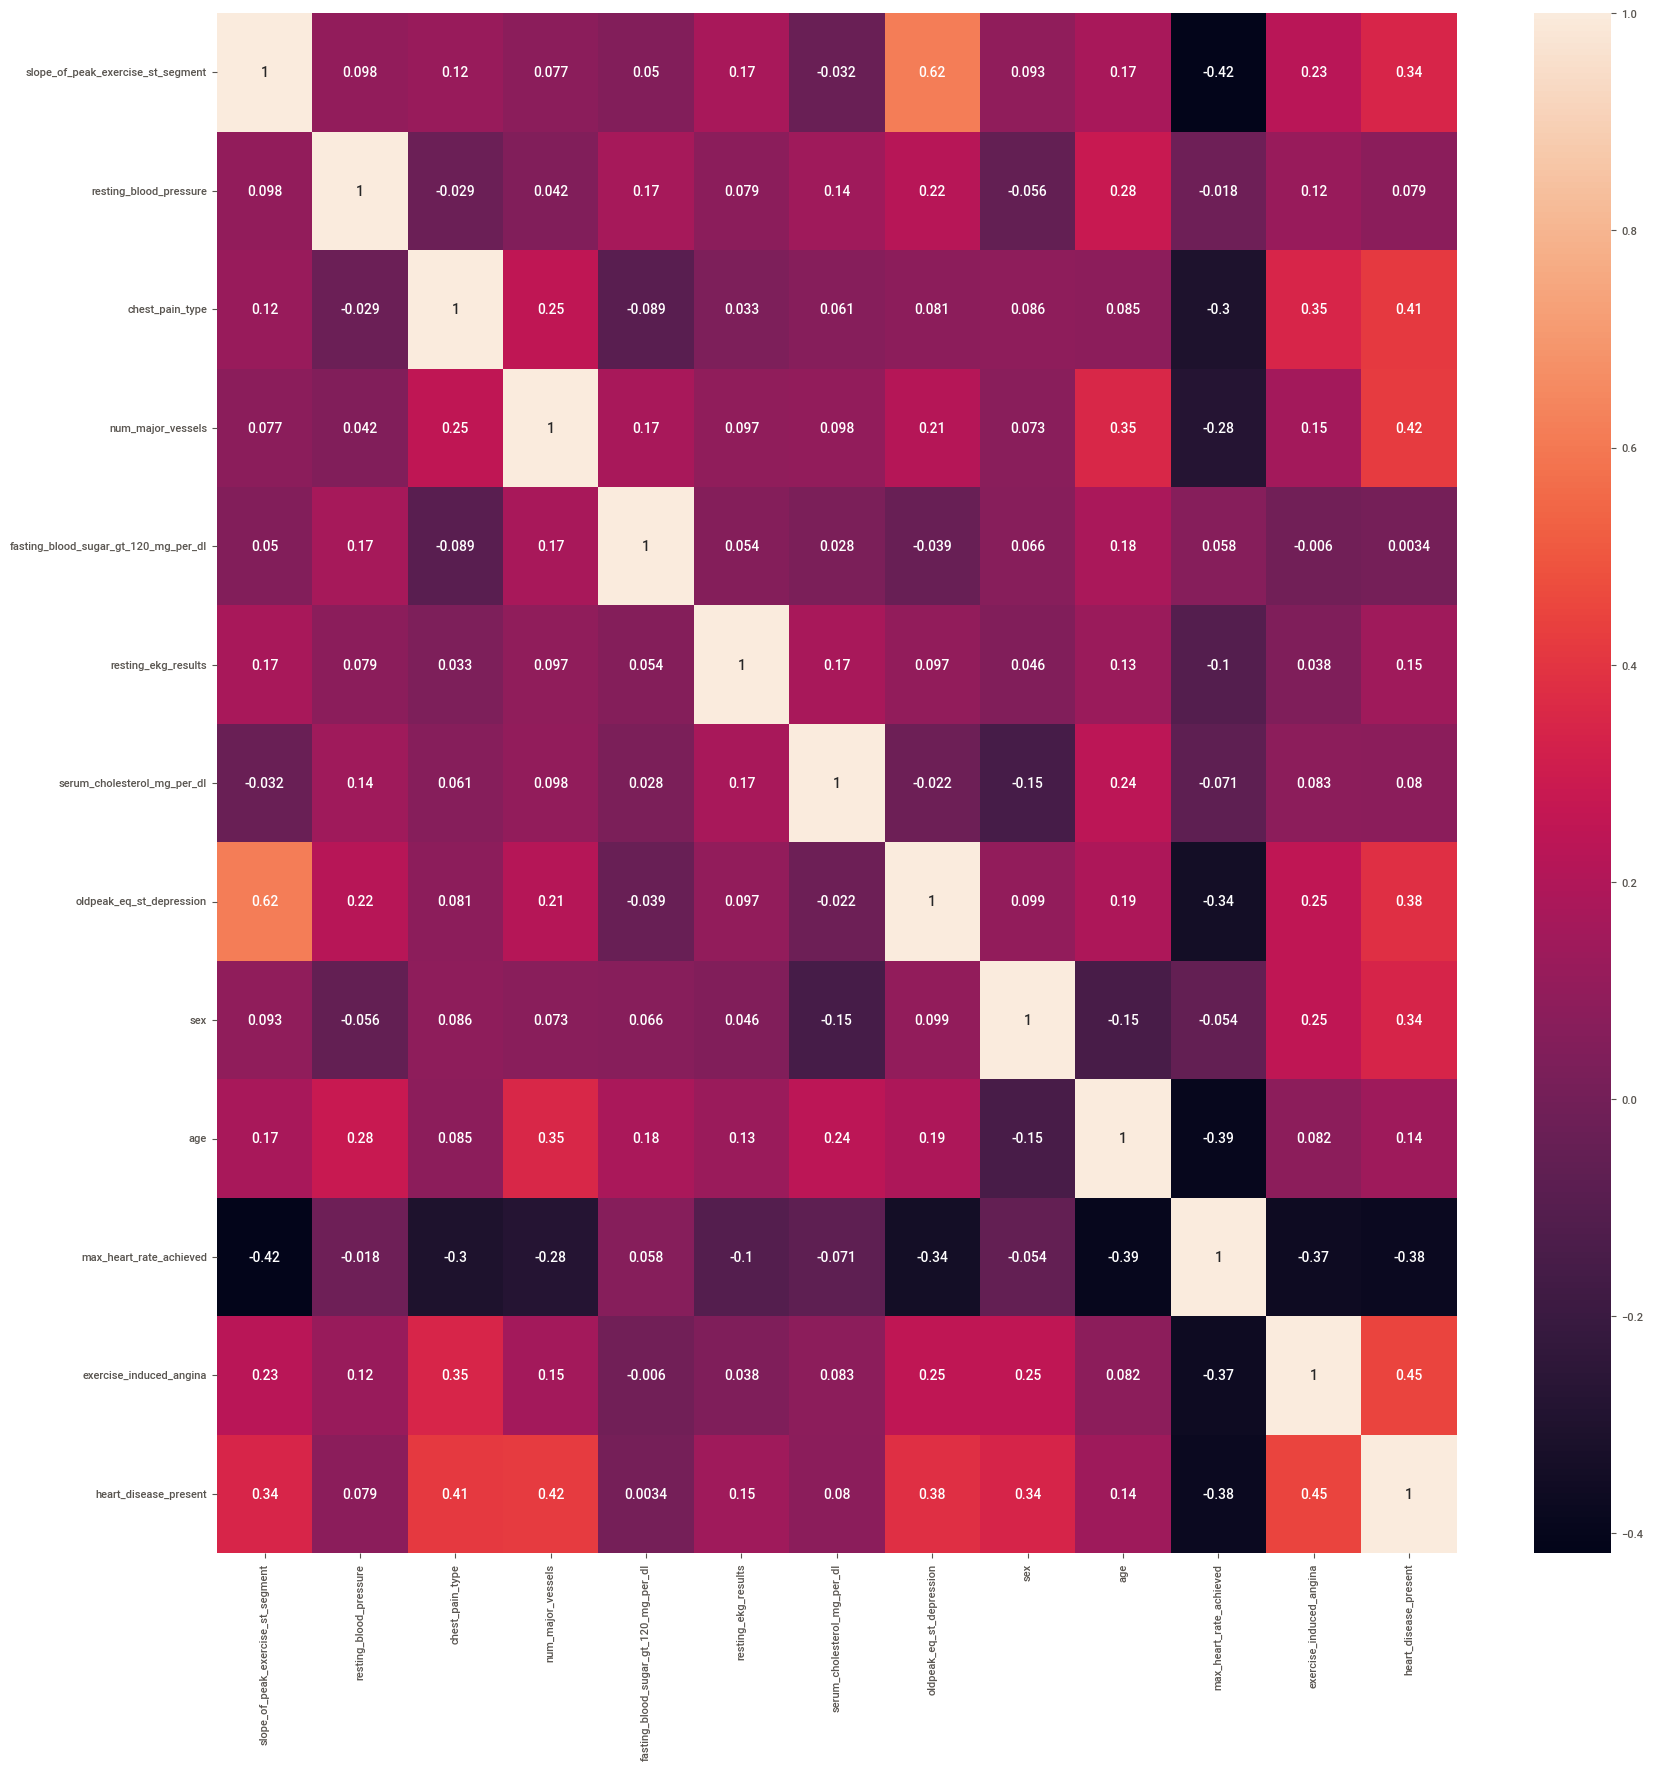

In [156]:

plt.figure(figsize=(20,20))                                  #plotting figure
numerical_data.drop('heart_disease_present',axis=1)          #dropping output column
sns.heatmap(numerical_data.corr(),annot=True)                #plotting heatmap
plt.show()


# # Model Creation


In [157]:
data.columns

Index(['heart_disease_present', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [158]:

#splitting the data into x and y
x=data[['slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved', 'exercise_induced_angina']]
y=data.heart_disease_present


In [159]:
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1.0,1.0,11.313708,1.414214,0.000000,0.0,1.414214,17.549929,0.000000,1.0,6.708204,170.0,0.0
1,2.0,1.0,10.488088,1.732051,0.000000,0.0,0.000000,14.628739,1.124683,0.0,7.348469,158.0,0.0
2,1.0,1.0,11.180340,2.000000,1.732051,0.0,1.414214,17.435596,0.000000,1.0,8.774964,162.0,1.0
3,1.0,2.0,12.328828,2.000000,0.000000,0.0,0.000000,14.933185,0.000000,1.0,6.324555,181.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
5,1.0,1.0,11.401754,1.732051,0.000000,0.0,0.000000,13.416408,0.000000,1.0,6.480741,150.0,0.0
6,2.0,2.0,12.247449,2.000000,1.414214,0.0,1.414214,16.062378,1.269823,0.0,7.745967,157.0,0.0
7,2.0,0.0,12.247449,2.000000,1.000000,0.0,1.414214,16.613248,0.880112,1.0,7.549834,112.0,1.0
8,3.0,2.0,13.038405,2.000000,0.000000,0.0,1.414214,18.055470,1.357906,1.0,7.681146,140.0,1.0
9,2.0,1.0,10.954451,1.732051,0.000000,0.0,0.000000,14.798649,1.124683,0.0,7.071068,158.0,0.0


In [160]:
y

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
5      0.0
6      1.0
7      1.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     1.0
29     0.0
30     0.0
31     1.0
32     0.0
33     0.0
34     1.0
35     0.0
36     0.0
37     0.0
38     0.0
39     1.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     1.0
46     0.0
47     0.0
48     1.0
49     0.0
50     1.0
51     0.0
52     0.0
53     0.0
54     1.0
55     0.0
56     1.0
57     1.0
58     0.0
59     1.0
60     0.0
61     1.0
62     0.0
63     0.0
64     0.0
65     1.0
66     1.0
67     0.0
68     0.0
69     1.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     1.0
78     1.0
79     1.0
80     0.0
81     1.0
82     1.0
83     1.0
84     0.0
85     1.0
86     0.0
87     1.0
88     0.0
89     0.0
90     0.0

In [161]:
from sklearn.preprocessing import MinMaxScaler        #importing minmaxscaler
scaler=MinMaxScaler()                                 #objecct creation for scaler
x_scaled=scaler.fit_transform(x)                      #fitting the data

In [162]:
x_scaled

array([[0.33333333, 0.5       , 0.86772183, ..., 0.76447079, 0.84158416,
        0.        ],
       [0.66666667, 0.5       , 0.80439967, ..., 0.83743579, 0.78217822,
        0.        ],
       [0.33333333, 0.5       , 0.85749293, ..., 1.        , 0.8019802 ,
        1.        ],
       ...,
       [0.66666667, 1.        , 0.85749293, ..., 0.91168461, 0.64851485,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.5       , 0.9701425 , ..., 0.83743579, 0.80693069,
        0.        ]])

In [163]:

from sklearn.model_selection import train_test_split                    #importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)   

In [164]:
x_train

array([[0.33333333, 0.5       , 0.87447463, ..., 0.72970373, 0.85148515,
        0.        ],
       [0.66666667, 0.5       , 0.88782616, ..., 0.79772404, 0.8019802 ,
        0.        ],
       [0.33333333, 0.5       , 0.84016805, ..., 0.98032595, 0.5990099 ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 1.        , 0.80439967, ..., 0.8753478 , 0.7029703 ,
        1.        ]])

In [165]:
x_test

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.81167945, 1.        , 0.57735027,
        0.        , 1.        , 0.89752747, 0.        , 1.        ,
        0.75592895, 0.75742574, 0.        ],
       [0.66666667, 1.        , 0.92354815, 1.        , 0.81649658,
        0.        , 1.        , 0.8850612 , 0.81976918, 1.        ,
        0.88273483, 0.7029703 , 1.        ],
       [0.33333333, 0.5       , 0.90748521, 0.70710678, 0.81649658,
        0.        , 0.        , 0.73598007, 0.        , 0.        ,
        0.90453403, 0.88613861, 0.        ],
       [0.66666667, 1.        , 0.92035799, 1.        , 0.        ,
        0.        , 1.     

In [166]:
y_train

132    0.0
90     0.0
38     0.0
169    0.0
115    0.0
171    1.0
156    0.0
2      1.0
176    0.0
46     0.0
85     1.0
152    1.0
82     1.0
147    0.0
26     0.0
155    0.0
98     0.0
111    0.0
76     0.0
36     0.0
164    0.0
22     0.0
104    0.0
75     0.0
146    0.0
11     0.0
6      1.0
27     0.0
112    1.0
4      0.0
32     0.0
101    0.0
128    1.0
95     0.0
10     0.0
114    0.0
133    1.0
0      0.0
136    0.0
70     0.0
64     0.0
44     0.0
123    0.0
28     1.0
40     0.0
138    0.0
139    0.0
25     0.0
23     0.0
144    1.0
81     1.0
79     1.0
84     0.0
39     1.0
108    0.0
86     0.0
127    0.0
175    0.0
166    0.0
47     0.0
94     0.0
137    1.0
168    0.0
61     1.0
73     0.0
33     0.0
43     0.0
135    0.0
141    0.0
62     0.0
178    0.0
119    0.0
122    0.0
105    0.0
53     0.0
5      0.0
162    1.0
3      1.0
167    1.0
49     0.0
35     0.0
80     0.0
77     1.0
34     1.0
7      1.0
110    0.0
91     1.0
83     1.0
158    0.0
163    1.0
89     0.0

In [167]:
y_test

19     0.0
42     0.0
153    1.0
78     1.0
145    0.0
15     1.0
24     0.0
68     0.0
113    0.0
118    1.0
93     1.0
159    1.0
69     1.0
142    0.0
45     1.0
16     0.0
51     0.0
125    0.0
96     1.0
56     1.0
97     0.0
120    0.0
143    1.0
30     0.0
9      0.0
172    1.0
60     0.0
18     0.0
148    1.0
173    1.0
109    1.0
55     0.0
140    1.0
126    0.0
66     1.0
29     0.0
117    1.0
65     1.0
67     0.0
31     1.0
12     1.0
41     0.0
124    1.0
100    0.0
161    0.0
Name: heart_disease_present, dtype: float64

In [168]:

print(x_train.shape)                                 #shape of x_train
print(x_test.shape)                                  #shape of x_test
print(y_train.shape)                                 #shape of y_train
print(y_test.shape)                                  #shape of y_test


(135, 13)
(45, 13)
(135,)
(45,)


In [169]:

#checking for imbalancing data
data.heart_disease_present.value_counts()


0.0    117
1.0     63
Name: heart_disease_present, dtype: int64

In [170]:

#smoting
from imblearn.over_sampling import SMOTE
smote=SMOTE()           #creating object for smote

In [171]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)       #fitting the training data to overcome imbalancing


In [172]:

from collections import Counter          #importing counter
print('Actual Classes',Counter(y_train))    #printing actual classes
print('Smote Classes',Counter(y_smote))       #printing smote classes

Actual Classes Counter({0.0: 94, 1.0: 41})
Smote Classes Counter({0.0: 94, 1.0: 94})


In [173]:
y_smote.value_counts()                #checking if the data is balanced or not


0.0    94
1.0    94
Name: heart_disease_present, dtype: int64


 # Logistic Regression

In [174]:

from sklearn.linear_model import LogisticRegression              #importing logistic regression
LR=LogisticRegression()                         #object creation for logistic regression
LR.fit(x_train,y_train)                       #fitting training data

LogisticRegression()

In [175]:

y_pred=LR.predict(x_test)               #predicting x_test data
y_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.])

In [176]:

# # Evaluation Metrics

In [177]:

#importing evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report

In [178]:
acc=accuracy_score(y_test,y_pred)     #accuracy score of logistic regression
acc

0.8666666666666667

In [179]:
cm=confusion_matrix(y_test,y_pred)     #confusion matrix of logistic regression
cm


array([[23,  0],
       [ 6, 16]], dtype=int64)

In [180]:

f1=f1_score(y_test,y_pred)                #f1 score of logistic regression
f1


0.8421052631578948

In [181]:
re=recall_score(y_test,y_pred)           #recall score of logistic regression
re

0.7272727272727273

In [182]:
pr=precision_score(y_test,y_pred)         #precision score of logistic regression
pr

1.0

In [183]:
print(classification_report(y_test,y_pred))        #classification report  of logistic regression


              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        23
         1.0       1.00      0.73      0.84        22

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.86        45
weighted avg       0.89      0.87      0.86        45




# # SVM


In [184]:

from sklearn.svm import SVC                 #importing svc
svclassifier=SVC()                          #base model with default parameters
svclassifier.fit(x_smote,y_smote)           #fitting smoting data


SVC()

In [185]:

y_hat=svclassifier.predict(x_test)          #predicting x_test data
y_hat                                       


array([0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.])

In [186]:
# # Evaluation Metrics for SVM Classifier


In [187]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix
acc=accuracy_score(y_test,y_hat)                   #accuracy score of svm classifier
acc

0.8888888888888888

In [188]:
f1=f1_score(y_test,y_hat)                          #f1_score ofsvm classifier
f1

0.8780487804878049

In [189]:


re=recall_score(y_test,y_hat)                      #recall score of svm classifier
re


0.8181818181818182

In [190]:

pr=precision_score(y_test,y_hat)                   #precision score of svm classifier
pr

0.9473684210526315

In [191]:
cm=confusion_matrix(y_test,y_hat)                  #confusion matrix of svm classifier
cm

array([[22,  1],
       [ 4, 18]], dtype=int64)

In [192]:

from sklearn.model_selection import cross_val_score                     #importing cross val score
scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())    

[0.56410256 0.7        0.57894737]
Cross validation Score: 0.6143499775078722
Std : 0.060866174615517694


# # Decision Tree

In [193]:

from sklearn.tree import DecisionTreeClassifier     #importing decision tree classifier
dt=DecisionTreeClassifier()                  #creating an object for decision tree
dt.fit(x_train,y_train)                      #fitting the training data


DecisionTreeClassifier()

In [194]:

y_hat=dt.predict(x_test)                 #predicting the testing data
y_hat


array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.])

In [195]:

y_train_predict=dt.predict(x_train)               #predicting the training data
y_train_predict

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [196]:
# # Evaluation Metrics for Decision Tree


In [197]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
acc_train=accuracy_score(y_train,y_train_predict)             #accuracy of training data of decision tree classifier
acc_train

1.0

In [198]:
f1_score=f1_score(y_train,y_train_predict)                  #f1_score of training data of decision tree
f1_score 


1.0

In [199]:

precision_score=precision_score(y_train,y_train_predict)         #precision score of training data of decision tree
precision_score

1.0

In [200]:
print(classification_report(y_train,y_train_predict))            #classification report for training data of decision tree


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        94
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [201]:
#testing data accuracy
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.7333333333333333

In [202]:
print(classification_report(y_test,y_hat))            #classification report of testing data of decision tree


              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77        23
         1.0       0.81      0.59      0.68        22

    accuracy                           0.73        45
   macro avg       0.75      0.73      0.73        45
weighted avg       0.75      0.73      0.73        45




# # Random Forest



In [203]:
from sklearn.ensemble import RandomForestClassifier       #importing random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)         #creating an object for random forest classifier
rf_clf.fit(x_train,y_train)                               #fitting training data



RandomForestClassifier()

In [204]:
y_predict=rf_clf.predict(x_test)                          #predicting x_test data
y_predict                                       




array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.])

In [205]:
# # Evaluation Metrics for Random Forest


acc=accuracy_score(y_test,y_predict)                      #accuracy score of random forest classifier
acc



0.8666666666666667

In [206]:
print(classification_report(y_test,y_predict))             #classification report of random forest classifier


              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        23
         1.0       1.00      0.73      0.84        22

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.86        45
weighted avg       0.89      0.87      0.86        45



# # GB Classifier




In [207]:
from sklearn.ensemble import GradientBoostingClassifier             #importing GB Classifier
gbm=GradientBoostingClassifier()                                    #object creation for GB Classifier
gbm.fit(x_train,y_train)                                            #fitting the data





GradientBoostingClassifier()

In [208]:


y_gbm=gbm.predict(x_test)                                          #predicting the price
y_gbm





array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

In [209]:
# # Evaluation Metrics for GB Classifier


from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report  #to check model performance
accuracy=accuracy_score(y_test,y_gbm)          #accuracy_score of GB Classifier
accuracy                               



0.8444444444444444

In [210]:
f1=f1_score(y_test,y_gbm)                      #f1_score of GB Classifier
f1



0.8108108108108109

In [211]:
prec=precision_score(y_test,y_gbm)             #precision_score of GB Classifier
prec




1.0

In [212]:
rec=recall_score(y_test,y_gbm)                #recall_score of GB Classifier
rec



0.6818181818181818

In [213]:
print(classification_report(y_test,y_gbm))


              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        23
         1.0       1.00      0.68      0.81        22

    accuracy                           0.84        45
   macro avg       0.88      0.84      0.84        45
weighted avg       0.88      0.84      0.84        45

